## Global Relational Novelty 

* The relational novelty concept is based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

* However, the idea of relational novelty here is a bit different. It is considering how similar the functions are in a specific phase and treatment to the functions pooled globally. 

In [1]:
import pandas as pd
import numpy as np
import math
import collections
import matplotlib.pyplot as plt

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5


%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase3_bogota0
%store -r subset_bogota0_phase4
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota0_phase5
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota1_phase5
%store -r subset_bogota1_phase4
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3
%store -r subset_bogota2_phase4

%store -r overall_phase2_bogota0
%store -r overall_phase2_bogota1
%store -r overall_phase2_bogota2
%store -r overall_phase2_bogota3

%store -r overall_phase1_bogota0
%store -r overall_phase1_bogota1
%store -r overall_phase1_bogota2
%store -r overall_phase1_bogota3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
new_list = overall_45['functions'].explode().to_list()
new_list = list(filter(None, new_list))
new_list

['.ready',
 '.click',
 '.mcheck',
 '.on',
 '.closest',
 '.list',
 '.find',
 '.form',
 '.toggleClass',
 '.val',
 'document.getElementById',
 'google.maps.Map',
 'bootstrap.min.css',
 'theme.min.css',
 'jquery.min.js',
 'bootstrap.min.js',
 'js.js',
 'jsondata.js',
 'css.css',
 '.getJSON',
 'test.json',
 'style.css',
 'map.js',
 'document.getElementById',
 'google.maps.Map',
 'google.maps.Marker',
 nan,
 nan,
 nan,
 'bootstrap.min.css',
 'style.css',
 '.JS',
 '.js',
 nan,
 nan,
 'jquery.min.js',
 '.js',
 'Rent.js',
 'Crimes.js',
 'google.maps.Map',
 'document.getElementById',
 '.ajax',
 'data.cityofchicago.org',
 'iimk.json',
 '.done',
 'data.length',
 'google.maps.Marker',
 'google.maps.LatLng',
 '.latitude',
 '.longitude',
 '.address',
 'rentMarker.push',
 'rentMarker.length',
 '.setMap',
 'google.maps.InfoWindow',
 'google.maps.event.addListener',
 'infowindow.close',
 'infowindow.setContent',
 'data.primary',
 'infowindow.open',
 'marker.get',
 '.innerHTML',
 'data.property',
 'data.

In [4]:
str1_nan = [x for x in new_list if str(x) != 'nan']
str1 = set(str1_nan)
str1 = list(str1)
len(str1)

34660

In [5]:
global_functions = {'Student': 'all', 'functions': [str1_nan], 'unique': [str1], 'len_unique': len(str1), 'phase': 0}
global_functions = pd.DataFrame(data=global_functions)
global_functions

,Student,functions,unique,len_unique,phase
0,all,"[.ready, .click, .mcheck, .on, .closest, .list...","[vars.search.enabled, .selection.prototype.att...",34660,0


## Append Global Functions with Bogota 0 Phase 5

In [6]:
subset_bogota0_phase5_all = overall_phase5_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase5_all = subset_bogota0_phase5_all[subset_bogota0_phase5_all['len_unique'] != 0]

In [7]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["unique"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.013866
1,fffeelipe,jmcuestasb,0.089286
2,fffeelipe,katherinsb,0.009228
3,fffeelipe,jjrodriguezn,0.035211
4,fffeelipe,DglyP,0.012088
...,...,...,...
430,lfvalderrama,gabi04,0.119048
431,lfvalderrama,all,0.001789
432,bsgarciac,gabi04,0.105263
433,bsgarciac,all,0.003780


In [8]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

,user1,user2,similarity
28,fffeelipe,all,0.003347
56,mnguzmanc,all,0.066272
83,jmcuestasb,all,0.001933
109,katherinsb,all,0.066070
134,jjrodriguezn,all,0.000894
158,DglyP,all,0.066705
181,Judgarciani,all,0.006059
203,sacastroc,all,0.002308
224,pcberriop,all,0.002597
244,hsmartineza,all,0.001904


## Append Global Functions with Bogota 0 Phase 4

In [9]:
subset_bogota0_phase4_all = overall_phase4_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase4_all = subset_bogota0_phase4_all[subset_bogota0_phase4_all['len_unique'] != 0]

In [10]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["unique"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.013108
1,fffeelipe,jmcuestasb,0.094937
2,fffeelipe,katherinsb,0.024194
3,fffeelipe,jjrodriguezn,0.038760
4,fffeelipe,DglyP,0.010620
...,...,...,...
430,lfvalderrama,gabi04,0.111111
431,lfvalderrama,all,0.001789
432,bsgarciac,gabi04,0.086705
433,bsgarciac,all,0.003751


In [11]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

,user1,user2,similarity
28,fffeelipe,all,0.003058
56,mnguzmanc,all,0.066070
83,jmcuestasb,all,0.001933
109,katherinsb,all,0.000606
134,jjrodriguezn,all,0.000808
158,DglyP,all,0.082054
181,Judgarciani,all,0.003982
203,sacastroc,all,0.002337
224,pcberriop,all,0.001904
244,hsmartineza,all,0.001818


## Append Global Functions with Bogota 0 Phase 3

In [12]:
subset_bogota0_phase3_all = overall_phase3_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase3_all = subset_bogota0_phase3_all[subset_bogota0_phase3_all['len_unique'] != 0]

In [13]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["unique"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.003923
1,fffeelipe,jmcuestasb,0.102273
2,fffeelipe,jjrodriguezn,0.096154
3,fffeelipe,DglyP,0.255814
4,fffeelipe,Judgarciani,0.058442
...,...,...,...
401,lfvalderrama,gabi04,0.103774
402,lfvalderrama,all,0.001702
403,bsgarciac,gabi04,0.097222
404,bsgarciac,all,0.002885


In [14]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000866
54,mnguzmanc,all,0.065580
80,jmcuestasb,all,0.001933
105,jjrodriguezn,all,0.000779
129,DglyP,all,0.000692
152,Judgarciani,all,0.003837
174,sacastroc,all,0.002077
195,pcberriop,all,0.001183
215,hsmartineza,all,0.001500
234,Moimolcp,all,0.002250


## Append Global Functions with Bogota 0 Phase 2

In [15]:
subset_bogota0_phase2_all = overall_phase2_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase2_all = subset_bogota0_phase2_all[subset_bogota0_phase2_all['len_unique'] != 0]

In [16]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["unique"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.100000
1,fffeelipe,jmcuestasb,0.102273
2,fffeelipe,jjrodriguezn,0.195122
3,fffeelipe,DglyP,0.255814
4,fffeelipe,Judgarciani,0.078431
...,...,...,...
401,lfvalderrama,gabi04,0.125000
402,lfvalderrama,all,0.001154
403,bsgarciac,gabi04,0.122222
404,bsgarciac,all,0.001731


In [17]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000866
54,mnguzmanc,all,0.000721
80,jmcuestasb,all,0.001933
105,jjrodriguezn,all,0.000548
129,DglyP,all,0.000692
152,Judgarciani,all,0.002308
174,sacastroc,all,0.001212
195,pcberriop,all,0.001183
215,hsmartineza,all,0.001010
234,Moimolcp,all,0.001125


## Append Global Functions with Bogota 0 Phase 1

In [18]:
subset_bogota0_phase1_all = overall_phase1_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase1_all = subset_bogota0_phase1_all[subset_bogota0_phase1_all['len_unique'] != 0]

In [19]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["unique"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.083333
1,fffeelipe,DglyP,0.041667
2,fffeelipe,Judgarciani,0.051724
3,fffeelipe,sacastroc,0.166667
4,fffeelipe,pcberriop,0.070175
...,...,...,...
295,janoguerab,bsgarciac,0.076923
296,janoguerab,all,0.000087
297,lfvalderrama,bsgarciac,0.079365
298,lfvalderrama,all,0.000837


In [20]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

,user1,user2,similarity
23,fffeelipe,all,0.000606
46,mnguzmanc,all,0.000144
68,DglyP,all,0.000115
89,Judgarciani,all,0.001154
109,sacastroc,all,0.000202
128,pcberriop,all,0.001154
146,hsmartineza,all,0.000664
163,Moimolcp,all,0.001125
179,JoseMolano,all,0.000087
194,maikellPardoA,all,0.000115


## Append Global Functions with Bogota 1 Phase 5

In [21]:
subset_bogota1_phase5_all = overall_phase5_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase5_all = subset_bogota1_phase5_all[subset_bogota1_phase5_all['len_unique'] != 0]

In [22]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["unique"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.091954
4,gasierram,dasalgadob,0.129032
...,...,...,...
625,jcrubioa,JairVillalba,0.088710
626,jcrubioa,all,0.009954
627,joahernandezca,JairVillalba,0.134969
628,joahernandezca,all,0.003606


In [23]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

,user1,user2,similarity
34,gasierram,all,0.001760
68,adamantwharf,all,0.000087
101,bdcajicam,all,0.001039
133,dfhincapiem,all,0.000115
164,helmeraac,all,0.000981
194,dasalgadob,all,0.000260
223,falperezgo,all,0.057963
251,djguzmanc,all,0.001875
278,gsuarezc04,all,0.001183
304,oeroaq,all,0.077236


## Append Global Functions with Bogota 1 Phase 4

In [24]:
subset_bogota1_phase4_all = overall_phase4_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase4_all = subset_bogota1_phase4_all[subset_bogota1_phase4_all['len_unique'] != 0]

In [25]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["unique"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.091954
4,gasierram,dasalgadob,0.129032
...,...,...,...
661,jcrubioa,JairVillalba,0.076271
662,jcrubioa,all,0.009954
663,joahernandezca,JairVillalba,0.125874
664,joahernandezca,all,0.003606


In [26]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

,user1,user2,similarity
35,gasierram,all,0.001760
70,adamantwharf,all,0.000087
104,bdcajicam,all,0.001039
137,dfhincapiem,all,0.000115
169,helmeraac,all,0.000981
200,dasalgadob,all,0.000260
230,falperezgo,all,0.057790
259,djguzmanc,all,0.001875
287,gsuarezc04,all,0.001183
314,oeroaq,all,0.089729


## Append Global Functions with Bogota 1 Phase 3

In [27]:
subset_bogota1_phase3_all = overall_phase3_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase3_all = subset_bogota1_phase3_all[subset_bogota1_phase3_all['len_unique'] != 0]

In [28]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["unique"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.070423
4,gasierram,dasalgadob,0.129032
...,...,...,...
661,jcrubioa,JairVillalba,0.070822
662,jcrubioa,all,0.009954
663,joahernandezca,JairVillalba,0.122302
664,joahernandezca,all,0.003549


In [29]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

,user1,user2,similarity
35,gasierram,all,0.001760
70,adamantwharf,all,0.000087
104,bdcajicam,all,0.001039
137,dfhincapiem,all,0.000115
169,helmeraac,all,0.000433
200,dasalgadob,all,0.000260
230,falperezgo,all,0.056088
259,djguzmanc,all,0.001443
287,gsuarezc04,all,0.001183
314,oeroaq,all,0.020571


## Append Global Functions with Bogota 1 Phase 2

In [30]:
subset_bogota1_phase2_all = overall_phase2_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase2_all = subset_bogota1_phase2_all[subset_bogota1_phase2_all['len_unique'] != 0]

In [31]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["unique"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.176471
1,gasierram,bdcajicam,0.176471
2,gasierram,dfhincapiem,0.235294
3,gasierram,helmeraac,0.142857
4,gasierram,dasalgadob,0.444444
...,...,...,...
661,jcrubioa,JairVillalba,0.054441
662,jcrubioa,all,0.009954
663,joahernandezca,JairVillalba,0.123077
664,joahernandezca,all,0.003549


In [32]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

,user1,user2,similarity
35,gasierram,all,0.000490
70,adamantwharf,all,0.000087
104,bdcajicam,all,0.000087
137,dfhincapiem,all,0.000115
169,helmeraac,all,0.000433
200,dasalgadob,all,0.000260
230,falperezgo,all,0.056088
259,djguzmanc,all,0.001298
287,gsuarezc04,all,0.001183
314,oeroaq,all,0.004357


## Append Global Functions with Bogota 1 Phase 1

In [33]:
subset_bogota1_phase1_all = overall_phase1_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase1_all = subset_bogota1_phase1_all[subset_bogota1_phase1_all['len_unique'] != 0]

In [34]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["unique"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.176471
1,gasierram,bdcajicam,0.176471
2,gasierram,helmeraac,0.150000
3,gasierram,dasalgadob,0.444444
4,gasierram,falperezgo,0.151515
...,...,...,...
523,jcrubioa,JairVillalba,0.008902
524,jcrubioa,all,0.009694
525,joahernandezca,JairVillalba,0.750000
526,joahernandezca,all,0.000087


In [35]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

,user1,user2,similarity
31,gasierram,all,0.000490
62,adamantwharf,all,0.000087
92,bdcajicam,all,0.000087
121,helmeraac,all,0.000173
149,dasalgadob,all,0.000260
176,falperezgo,all,0.000606
202,djguzmanc,all,0.000981
227,oeroaq,all,0.003347
251,gcantem,all,0.003260
274,Semoralesga,all,0.000144


## Append Global Functions with Bogota 2 Phase 5

In [36]:
subset_bogota2_phase5_all = overall_phase5_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase5_all = subset_bogota2_phase5_all[subset_bogota2_phase5_all['len_unique'] != 0]

In [37]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["unique"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.005635
3,jusherrerama,ccvacad,0.004275
4,jusherrerama,joaortizro,0.002639
...,...,...,...
736,lsfinite,jscontrerasp,0.002871
737,lsfinite,all,0.140277
738,xdanielsb,jscontrerasp,0.020790
739,xdanielsb,all,0.013358


In [38]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

,user1,user2,similarity
37,jusherrerama,all,0.065234
74,bdvegat,all,0.000317
110,Phoenixest,all,0.000144
145,HashNick,all,0.001702
179,ccvacad,all,0.002539
212,joaortizro,all,0.000548
244,juasmartinezbel,all,0.005857
275,mdbelloc,all,0.001529
305,diegocruz10,all,0.001154
334,sagilm,all,0.001039


## Append Global Functions with Bogota 2 Phase 4

In [39]:
subset_bogota2_phase4_all = overall_phase4_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase4_all = subset_bogota2_phase4_all[subset_bogota2_phase4_all['len_unique'] != 0]

In [40]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["unique"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.005635
3,jusherrerama,ccvacad,0.003871
4,jusherrerama,joaortizro,0.002639
...,...,...,...
736,lsfinite,jscontrerasp,0.002871
737,lsfinite,all,0.140277
738,xdanielsb,jscontrerasp,0.028000
739,xdanielsb,all,0.006607


In [41]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

,user1,user2,similarity
37,jusherrerama,all,0.065234
74,bdvegat,all,0.000317
110,Phoenixest,all,0.000144
145,HashNick,all,0.001702
179,ccvacad,all,0.002106
212,joaortizro,all,0.000548
244,juasmartinezbel,all,0.005857
275,mdbelloc,all,0.001529
305,diegocruz10,all,0.001154
334,sagilm,all,0.000606


## Append Global Functions with Bogota 2 Phase 3

In [42]:
subset_bogota2_phase3_all = overall_phase3_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase3_all = subset_bogota2_phase3_all[subset_bogota2_phase3_all['len_unique'] != 0]

In [43]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["unique"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.004340
3,jusherrerama,joaortizro,0.002639
4,jusherrerama,juasmartinezbel,0.004601
...,...,...,...
698,lsfinite,jscontrerasp,0.003078
699,lsfinite,all,0.140219
700,xdanielsb,jscontrerasp,0.032710
701,xdanielsb,all,0.005568


In [44]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

,user1,user2,similarity
36,jusherrerama,all,0.065234
72,bdvegat,all,0.000317
107,Phoenixest,all,0.000144
141,HashNick,all,0.001529
174,joaortizro,all,0.000548
206,juasmartinezbel,all,0.004068
237,mdbelloc,all,0.001529
267,diegocruz10,all,0.001154
296,sagilm,all,0.000606
324,idrojasf,all,0.017167


## Append Global Functions with Bogota 2 Phase 2

In [45]:
subset_bogota2_phase2_all = overall_phase2_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase2_all = subset_bogota2_phase2_all[subset_bogota2_phase2_all['len_unique'] != 0]

In [46]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["unique"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.176471
1,jusherrerama,Phoenixest,0.166667
2,jusherrerama,HashNick,0.045455
3,jusherrerama,joaortizro,0.173913
4,jusherrerama,juasmartinezbel,0.035088
...,...,...,...
698,lsfinite,jscontrerasp,0.002060
699,lsfinite,all,0.139700
700,xdanielsb,jscontrerasp,0.029851
701,xdanielsb,all,0.005338


In [47]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

,user1,user2,similarity
36,jusherrerama,all,0.000462
72,bdvegat,all,0.000115
107,Phoenixest,all,0.000144
141,HashNick,all,0.001529
174,joaortizro,all,0.000317
206,juasmartinezbel,all,0.002943
237,mdbelloc,all,0.001529
267,diegocruz10,all,0.000779
296,sagilm,all,0.000144
324,idrojasf,all,0.017167


## Append Global Functions with Bogota 2 Phase 1

In [48]:
subset_bogota2_phase1_all = overall_phase1_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase1_all = subset_bogota2_phase1_all[subset_bogota2_phase1_all['len_unique'] != 0]

In [49]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["unique"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.176471
1,jusherrerama,Phoenixest,0.166667
2,jusherrerama,HashNick,0.041667
3,jusherrerama,joaortizro,0.040000
4,jusherrerama,juasmartinezbel,0.038835
...,...,...,...
661,lsfinite,jscontrerasp,0.166667
662,lsfinite,all,0.000260
663,xdanielsb,jscontrerasp,0.017964
664,xdanielsb,all,0.004761


In [50]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

,user1,user2,similarity
35,jusherrerama,all,0.000462
70,bdvegat,all,0.000115
104,Phoenixest,all,0.000144
137,HashNick,all,0.001702
169,joaortizro,all,0.000289
200,juasmartinezbel,all,0.002626
230,mdbelloc,all,0.001529
259,diegocruz10,all,0.000750
287,sagilm,all,0.000087
314,idrojasf,all,0.017167


## Append Global Functions with Bogota 3 Phase 5

In [51]:
subset_bogota3_phase5_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase5_all = subset_bogota3_phase5_all[subset_bogota3_phase5_all['len_unique'] != 0]

In [52]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase5_all["unique"], subset_bogota3_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005428
1,lemartinp,nfmorenog,0.164179
2,lemartinp,AFelipeGA,0.006274
3,lemartinp,mballeng91,0.004902
4,lemartinp,dduartec,0.005530
...,...,...,...
736,lizzyt10h,jumcorredorro,0.066667
737,lizzyt10h,all,0.002164
738,NicolasPrr,jumcorredorro,0.097902
739,NicolasPrr,all,0.003837


In [53]:
subset_bogota3_phase5_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase5_all_only

,user1,user2,similarity
37,lemartinp,all,0.000750
74,juligarji,all,0.074062
110,nfmorenog,all,0.001500
145,AFelipeGA,all,0.059406
179,mballeng91,all,0.005164
212,dduartec,all,0.067455
244,srmedinac,all,0.001616
275,wilson911013,all,0.000087
305,wapiravaguens,all,0.002568
334,davidh17,all,0.002539


## Append Global Functions with Bogota 3 Phase 4

In [54]:
subset_bogota3_phase4_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase4_all = subset_bogota3_phase4_all[subset_bogota3_phase4_all['len_unique'] != 0]

In [55]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase4_all["unique"], subset_bogota3_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005437
1,lemartinp,nfmorenog,0.164179
2,lemartinp,AFelipeGA,0.006274
3,lemartinp,mballeng91,0.004902
4,lemartinp,dduartec,0.048000
...,...,...,...
698,lizzyt10h,jumcorredorro,0.064220
699,lizzyt10h,all,0.001904
700,NicolasPrr,jumcorredorro,0.048447
701,NicolasPrr,all,0.019561


In [56]:
subset_bogota3_phase4_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase4_all_only

,user1,user2,similarity
36,lemartinp,all,0.000750
72,juligarji,all,0.073947
107,nfmorenog,all,0.001500
141,AFelipeGA,all,0.059406
174,mballeng91,all,0.005164
206,dduartec,all,0.003029
237,srmedinac,all,0.001616
267,wilson911013,all,0.000087
296,wapiravaguens,all,0.002424
324,davidh17,all,0.002568


## Append Global Functions with Bogota 3 Phase 3

In [57]:
subset_bogota3_phase3_all = overall_phase3_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase3_all = subset_bogota3_phase3_all[subset_bogota3_phase3_all['len_unique'] != 0]

In [58]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["unique"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.002394
1,lemartinp,nfmorenog,0.155172
2,lemartinp,AFelipeGA,0.002417
3,lemartinp,mballeng91,0.000000
4,lemartinp,dduartec,0.052632
...,...,...,...
661,lizzyt10h,jumcorredorro,0.098039
662,lizzyt10h,all,0.000490
663,NicolasPrr,jumcorredorro,0.055046
664,NicolasPrr,all,0.000577


In [59]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

,user1,user2,similarity
35,lemartinp,all,0.000433
70,juligarji,all,0.072043
104,nfmorenog,all,0.001500
137,AFelipeGA,all,0.059406
169,mballeng91,all,0.005049
200,dduartec,all,0.003029
230,srmedinac,all,0.001645
259,wapiravaguens,all,0.002424
287,davidh17,all,0.001789
314,DianaNavarrete,all,0.000202


## Append Global Functions with Bogota 3 Phase 2

In [60]:
subset_bogota3_phase2_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase2_all = subset_bogota3_phase2_all[subset_bogota3_phase2_all['len_unique'] != 0]

In [61]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase2_all["unique"], subset_bogota3_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.034722
1,lemartinp,nfmorenog,0.183673
2,lemartinp,AFelipeGA,0.002417
3,lemartinp,mballeng91,0.000000
4,lemartinp,dduartec,0.125000
...,...,...,...
661,lizzyt10h,jumcorredorro,0.181818
662,lizzyt10h,all,0.000375
663,NicolasPrr,jumcorredorro,0.092593
664,NicolasPrr,all,0.000577


In [62]:
subset_bogota3_phase2_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase2_all_only

,user1,user2,similarity
35,lemartinp,all,0.000433
70,juligarji,all,0.003866
104,nfmorenog,all,0.001241
137,AFelipeGA,all,0.059406
169,mballeng91,all,0.005049
200,dduartec,all,0.001125
230,srmedinac,all,0.001645
259,wapiravaguens,all,0.001818
287,davidh17,all,0.001241
314,DianaNavarrete,all,0.000202


## Append Global Functions with Bogota 3 Phase 1

In [63]:
subset_bogota3_phase1_all = overall_phase1_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase1_all = subset_bogota3_phase1_all[subset_bogota3_phase1_all['len_unique'] != 0]

In [64]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["unique"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.043478
1,lemartinp,nfmorenog,0.200000
2,lemartinp,AFelipeGA,0.016807
3,lemartinp,mballeng91,0.000000
4,lemartinp,dduartec,0.038462
...,...,...,...
698,lizzyt10h,jumcorredorro,0.201550
699,lizzyt10h,all,0.003520
700,NicolasPrr,jumcorredorro,0.104167
701,NicolasPrr,all,0.000577


In [65]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

,user1,user2,similarity
36,lemartinp,all,0.000231
72,juligarji,all,0.000462
107,nfmorenog,all,0.000462
141,AFelipeGA,all,0.003260
174,mballeng91,all,0.004761
206,dduartec,all,0.000548
237,srmedinac,all,0.001673
267,wapiravaguens,all,0.000952
296,davidh17,all,0.000462
324,DianaNavarrete,all,0.000173


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

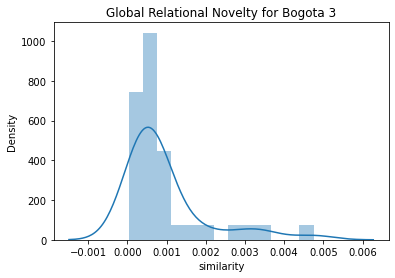

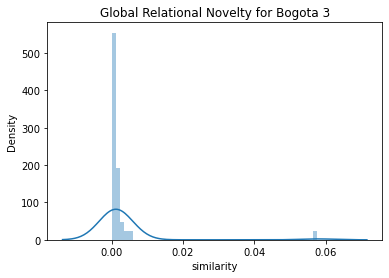

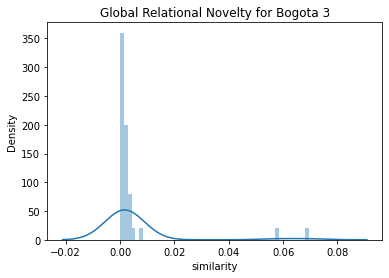

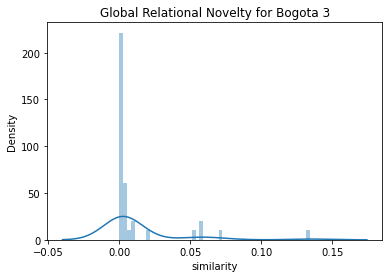

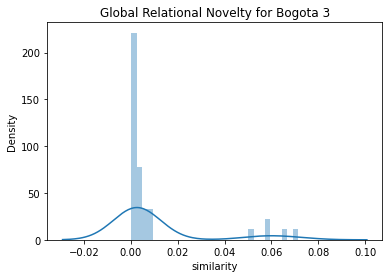

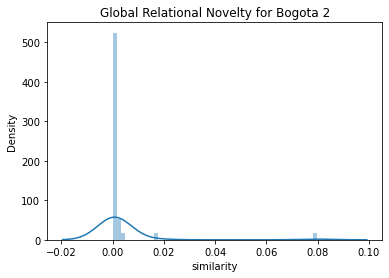

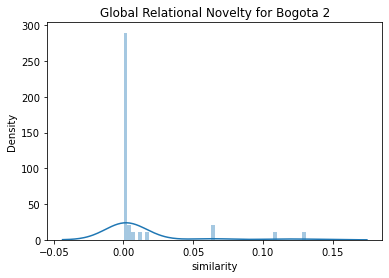

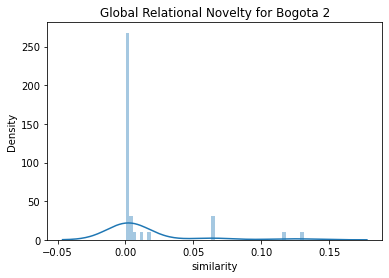

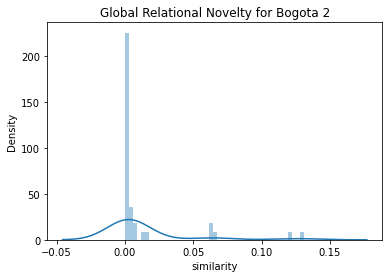

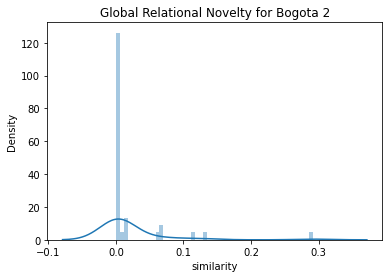

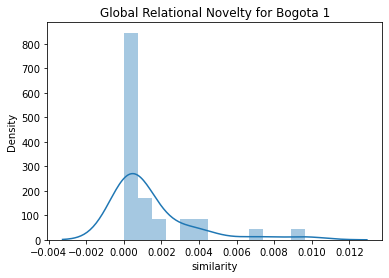

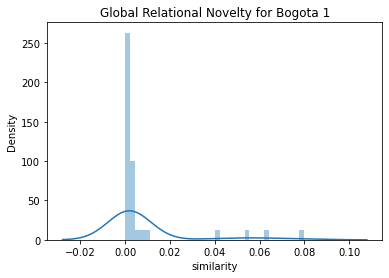

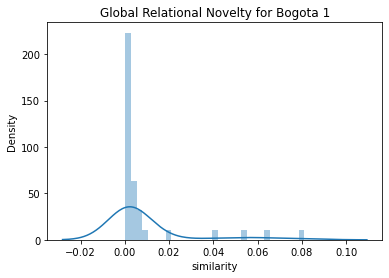

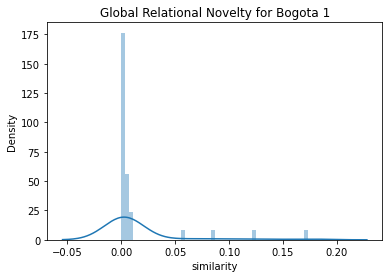

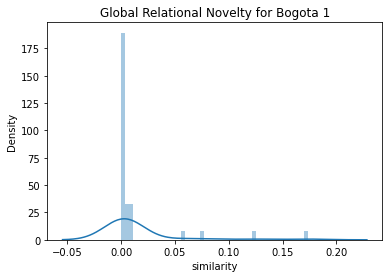

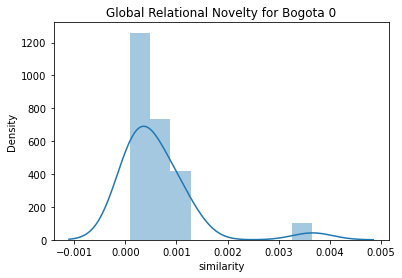

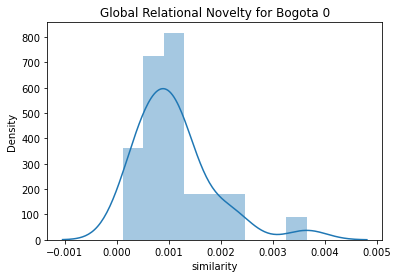

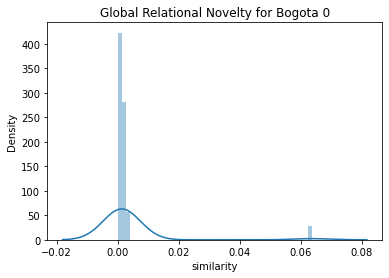

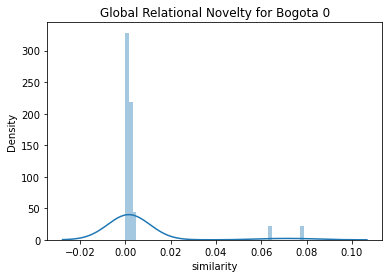

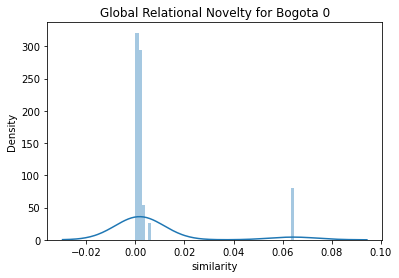

In [66]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

for df in [subset_bogota3_phase1_all_only, subset_bogota3_phase2_all_only, subset_bogota3_phase3_all_only, subset_bogota3_phase4_all_only, subset_bogota3_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota2_phase1_all_only, subset_bogota2_phase2_all_only, subset_bogota2_phase3_all_only, subset_bogota2_phase4_all_only, subset_bogota2_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [subset_bogota1_phase1_all_only, subset_bogota1_phase2_all_only, subset_bogota1_phase3_all_only, subset_bogota1_phase4_all_only, subset_bogota1_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota0_phase1_all_only, subset_bogota0_phase2_all_only, subset_bogota0_phase3_all_only, subset_bogota0_phase4_all_only, subset_bogota0_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 0")
    sns.distplot(np.log(df['similarity']+1))

> Interpretation: The distribution is positively skewed, so we should consider the median 

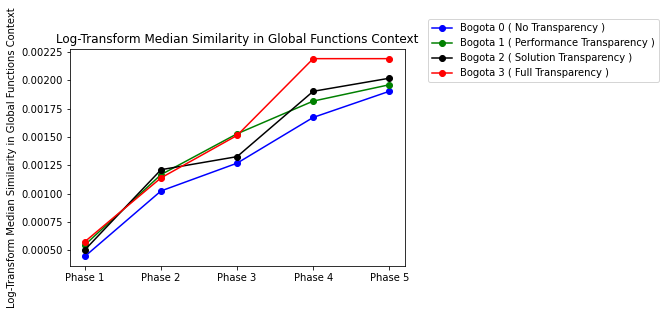

In [67]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Similarity in Global Functions Context")
plt.ylabel("Log-Transform Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> Interpretations: A lot of the functions from the global pool comes from phase 4 and phase 5 of the full transparency case. 

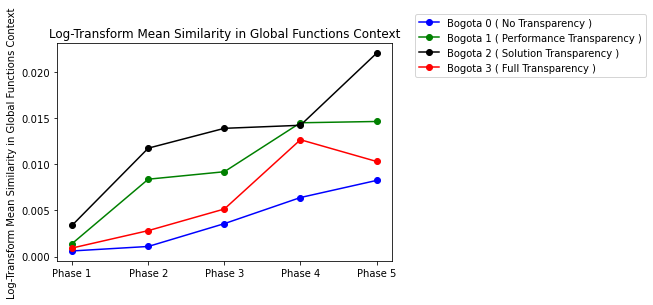

In [68]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Mean Similarity in Global Functions Context")
plt.ylabel("Log-Transform Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

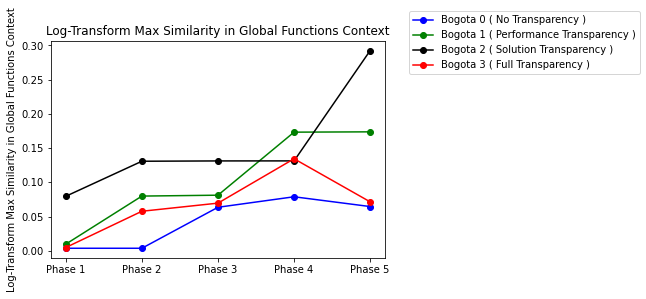

In [69]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Max Similarity in Global Functions Context")
plt.ylabel("Log-Transform Max Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [70]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3

Stored 'overall_phase1' (DataFrame)
Stored 'overall_phase2' (DataFrame)
Stored 'overall_phase3' (DataFrame)
Stored 'overall_phase4' (DataFrame)
Stored 'overall_phase5' (DataFrame)


UsageError: Unknown variable 'df_all'
